In [1]:
import pdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Set parameters

In [2]:
n_parts = 12
rois_plt = ['Precentral','Postcentral','Temporal_Mid','Temporal_Inf']
sbplt_titles = ['Precentral\nGyrus','Postcentral\nGyrus',
                'Middle Temporal\nGyrus','Inferior Temporal\nGyrus']
freq_range = [3, 125]
lp = '/data1/users/stepeter/mvmt_init/data_spec/'
fig_sp = '/data1/users/stepeter/mvmt_init/figs/'

### Aggregate power results and plot power spectra across participants

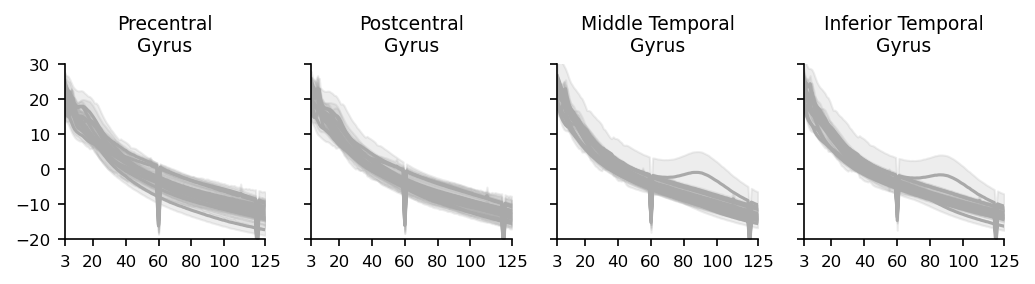

In [3]:
freqs_vals = np.arange(freq_range[0],freq_range[1]+1).tolist()
power, freqs, parts = [], [], []

nrows, ncols = 1, 4
fig, ax = plt.subplots(nrows,ncols,figsize=(7,2),dpi=150)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.1)
n_wins_sbj = []
for k,roi in enumerate(rois_plt):
    power_roi, freqs_roi, parts_roi = [], [], []
    for j in range(n_parts):
        dat = np.load(lp+'P'+str(j+1).zfill(2)+'_'+roi+'.npy')
        dat = 10*np.log10(dat)
        for i in range(dat.shape[0]):
            power_roi.extend(dat[i,:].tolist())
            freqs_roi.extend(freqs_vals)
            parts_roi.extend(['P'+str(j+1).zfill(2)]*len(freqs_vals))
        if k==0:
            n_wins_sbj.append(dat.shape[0])
    power.extend(power_roi)
    freqs.extend(freqs_roi)
    parts.extend(parts_roi)
    
    parts_uni = np.unique(np.asarray(parts_roi))[::-1].tolist()
    df_roi = pd.DataFrame({'Power': power_roi, 'Freqs': freqs_roi, 'Parts': parts_roi})
    row, col = k//ncols, k%ncols
    ax_curr = ax[row,col] if nrows > 1 else ax[col]
    leg = False # 'brief' if k==3 else False
    sns.lineplot(data=df_roi, x="Freqs", y="Power", hue="Parts",
                 ax=ax_curr, ci='sd', legend=leg, palette=['darkgray']*len(parts_uni),
                 hue_order=parts_uni) # palette='Blues'
#     ax_curr.set_xscale('log')
    ax_curr.set_xlim(freq_range)
    ax_curr.set_ylim([-20,30])
    ax_curr.spines['right'].set_visible(False)
    ax_curr.spines['top'].set_visible(False)
    ax_curr.set_xlim(freq_range)
    ax_curr.set_xticks([freq_range[0]]+np.arange(20,101,20).tolist()+[freq_range[1]])
    ylab = ''  # '' if k%ncols > 0 else 'Power\n(dB)'  # 10log(uV^2)
    xlab = ''  # 'Frequency (Hz)' if k//ncols==(nrows-1) else ''
    ax_curr.set_ylabel(ylab, rotation=0, labelpad=15, fontsize=9)
    ax_curr.set_xlabel(xlab, fontsize=9)
    if k%ncols > 0:
        l_yticks = len(ax_curr.get_yticklabels())
        ax_curr.set_yticks(ax_curr.get_yticks().tolist())
        ax_curr.set_yticklabels(['']*l_yticks)
    ax_curr.tick_params(axis='both', which='major', labelsize=8)
    ax_curr.set_title(sbplt_titles[k], fontsize=9)
fig.tight_layout()

# fig_name = 'data_ecog_val_horiz'
# fig.savefig(fig_sp+fig_name+'.png',
#             format='png',transparent= True,dpi=300,
#             bbox_inches = 'tight', pad_inches = 0.01,
#             )
plt.show()

## Plot single-participant power spectra

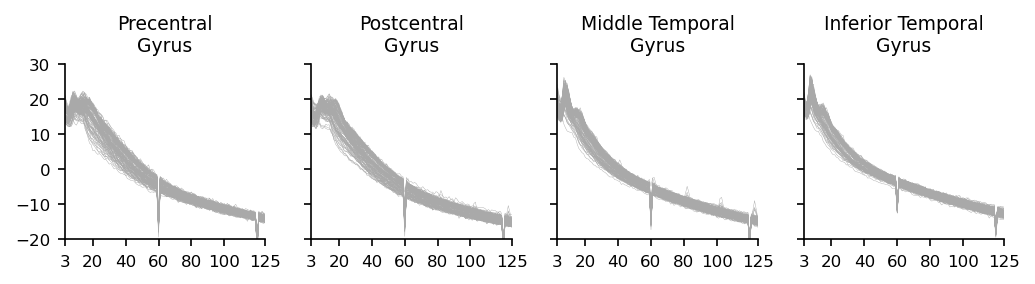

In [4]:
part_id = 'P01'
freqs_vals = np.arange(freq_range[0],freq_range[1]+1).tolist()
power, freqs, parts = [], [], []

nrows, ncols = 1, 4
fig, ax = plt.subplots(nrows, ncols,figsize=(7,2),dpi=150)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.1)
n_wins_sbj = []
for k,roi in enumerate(rois_plt):
    power_roi, freqs_roi, parts_roi = [], [], []
    
    dat = np.load(lp+part_id+'_'+roi+'.npy')
    dat = 10*np.log10(dat)
    for i in range(dat.shape[0]):
        power_roi.extend(dat[i,:].tolist())
        freqs_roi.extend(freqs_vals)
        parts_roi.extend([i]*len(freqs_vals))
    if k==0:
        n_wins_sbj.append(dat.shape[0])
    power.extend(power_roi)
    freqs.extend(freqs_roi)
    parts.extend(parts_roi)
    
    parts_uni = np.unique(np.asarray(parts_roi))[::-1].tolist()
    df_roi = pd.DataFrame({'Power': power_roi, 'Freqs': freqs_roi, 'Parts': parts_roi})
    row, col = k//ncols, k%ncols
    ax_curr = ax[row,col] if nrows > 1 else ax[col]
    leg = False # 'brief' if k==3 else False
    sns.lineplot(data=df_roi, x="Freqs", y="Power", hue="Parts",
                 ax=ax_curr, ci=None, legend=leg, palette=['darkgray']*len(parts_uni),
                 hue_order=parts_uni, linewidth=0.2) # palette='Blues'
    ax_curr.set_xlim(freq_range)
    ax_curr.set_ylim([-20,30])
    ax_curr.spines['right'].set_visible(False)
    ax_curr.spines['top'].set_visible(False)
    ax_curr.set_xlim(freq_range)
    ax_curr.set_xticks([freq_range[0]]+np.arange(20,101,20).tolist()+[freq_range[1]])
    ylab = ''  # '' if k%ncols > 0 else 'Power\n(dB)'  # 10log(uV^2)
    xlab = ''  # 'Frequency (Hz)' if k//ncols==(nrows-1) else ''
    ax_curr.set_ylabel(ylab, rotation=0, labelpad=15, fontsize=9)
    ax_curr.set_xlabel(xlab, fontsize=9)
    if k%ncols > 0:
        l_yticks = len(ax_curr.get_yticklabels())
        ax_curr.set_yticks(ax_curr.get_yticks().tolist())
        ax_curr.set_yticklabels(['']*l_yticks)
    ax_curr.tick_params(axis='both', which='major', labelsize=8)
    ax_curr.set_title(sbplt_titles[k], fontsize=9)
fig.tight_layout()

# fig_name = 'data_ecog_val_1pat_horiz'
# fig.savefig(fig_sp+fig_name+'.png',
#             format='png',transparent= True,dpi=300,
#             bbox_inches = 'tight', pad_inches = 0.01,
#             )
plt.show()